# Shapefiles

Shapefiles are a popular data format for geospatial data. A shapefile usually consists of several related files, such as:

- a `.shp` file that stores the geometric location and shape of each feature
- a `.prj` file that stores the map projection
- a `.dbf` file containing tabular data about each feature

Shapefiles are especially useful for drawing boundaries of countries, states, counties, etc. You can typically find shapefiles by searching on Google.

## Preparation

Download the shapefile of the countries of the world from [this website](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?flg=en-us) as a `.zip` file. Upload this `.zip` file to the Colab runtime and unzip it by running the cell below.

In [1]:
!unzip data/world-administrative-boundaries.zip

Archive:  data/world-administrative-boundaries.zip
  inflating: world-administrative-boundaries.prj  
  inflating: world-administrative-boundaries.cpg  
  inflating: world-administrative-boundaries.dbf  
  inflating: world-administrative-boundaries.shp  
  inflating: world-administrative-boundaries.shx  


Now, you should be able to see these files in the file browser. (If you can't, press the refresh button.)

To read in a shapefile, we can use Geopandas.

In [55]:
import geopandas as gpd
import contextily as cx

directory = "data"
# You can read in any of the files in the shapefile and get the same result.
gdf_world = gpd.read_file(f"{directory}/world-administrative-boundaries.zip")
gdf_world

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,None,PT Territory,PRT,Madeira Islands,Europe,Southern Europe,None,Madeira Islands,"POLYGON ((-17.1025 32.82333, -17.05306 32.8094..."
1,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
2,None,US Territory,USA,Midway Is.,Americas,Northern America,None,Midway Is.,"POLYGON ((-177.38806 28.18638, -177.39334 28.1..."
3,SAU,Member State,SAU,Saudi Arabia,Asia,Western Asia,SA,Arabie saoudite,"MULTIPOLYGON (((41.945 16.71083, 41.95777 16.7..."
4,ZAF,Member State,ZAF,South Africa,Africa,Southern Africa,ZA,Afrique du Sud,"POLYGON ((31.2975 -22.41476, 31.30292 -22.4248..."
...,...,...,...,...,...,...,...,...,...
251,BOL,Member State,BOL,Bolivia,Americas,South America,BO,Bolivie (État plurinational de),"POLYGON ((-58.15889 -20.16806, -58.13722 -20.1..."
252,CUB,Member State,CUB,Cuba,Americas,Caribbean,CU,Cuba,"MULTIPOLYGON (((-82.5446 21.57389, -82.59862 2..."
253,MYS,Member State,MYS,Malaysia,Asia,South-Eastern Asia,MY,Malaisie,"MULTIPOLYGON (((111.41152 2.37639, 111.36804 2..."
254,CCK,AU Territory,AUS,Cocos (Keeling) Islands,Asia,South-Eastern Asia,CC,Cocos (Keeling) Islands,"POLYGON ((96.86484 -12.19208, 96.85248 -12.199..."


Now, we can visualize this map by calling `.plot()` on this `GeoDataFrame`, as we saw in lecture.

<Axes: >

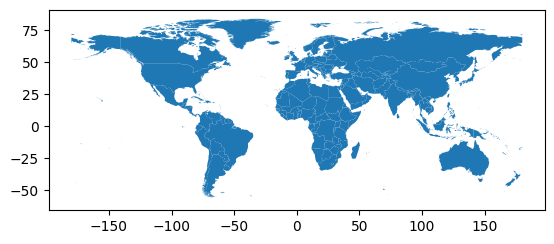

In [3]:
gdf_world.plot()

We can find out the map projection that was used. (This information would have been in the `.prj` file in the shapefile.)

In [4]:
gdf_world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Can you figure out how to customize the colors of the borders and the countries?

_Hint:_ Take a look at the documentation for [`.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot).

<Axes: >

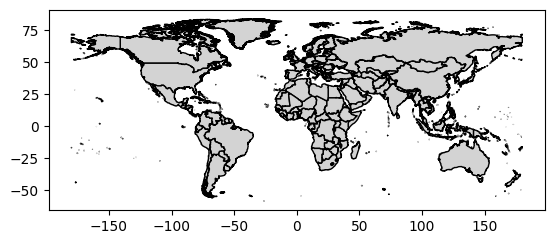

In [5]:
gdf_world.plot(edgecolor="black", facecolor="lightgray")

## Mystery 1

The file https://datasci112.stanford.edu/data/dotmap_world.csv contains a mystery data set consisting of locations over the world.

Make a **dot map** of this data on top of a world map. Can you figure out what this is a data set of?

_Hint:_ https://datasci112.stanford.edu/data/dotmap_world_future.csv contains additional data, if you are stuck.

In [15]:
import pandas as pd

# Read the data
df_dotmap = pd.read_csv(f"{directory}/dotmap_world.csv")
df_dotmap

,year,longitude,latitude
0,1982,-2.949369,43.264205
1,1982,-5.970467,37.383878
2,1998,-1.525278,47.255556
3,1938,3.036111,50.637500
4,1938,1.434055,43.583296
...,...,...,...
199,1938,0.171111,49.501944
200,1950,-43.917778,-19.908333
201,2002,128.690205,35.829739
202,1986,-101.356300,20.684500


In [29]:
gdf_dotmap = gpd.GeoDataFrame(
    df_dotmap,
    geometry=gpd.points_from_xy(
        x=df_dotmap["longitude"],
        y=df_dotmap["latitude"]
    ),
    crs="EPSG:4326"
)
gdf_dotmap.sort_values("year")

,year,longitude,latitude,geometry
127,1930,-56.152778,-34.894444,POINT (-56.15278 -34.89444)
76,1930,-56.156200,-34.905053,POINT (-56.1562 -34.90505)
148,1930,-56.159000,-34.884500,POINT (-56.159 -34.8845)
37,1934,14.293333,40.859722,POINT (14.29333 40.85972)
65,1934,11.309719,44.493620,POINT (11.30972 44.49362)
...,...,...,...,...
55,2022,51.574083,25.159778,POINT (51.57408 25.15978)
126,2022,51.490389,25.420861,POINT (51.49039 25.42086)
110,2022,51.448056,25.263611,POINT (51.44806 25.26361)
80,2022,51.424274,25.310595,POINT (51.42427 25.3106)


<Axes: >

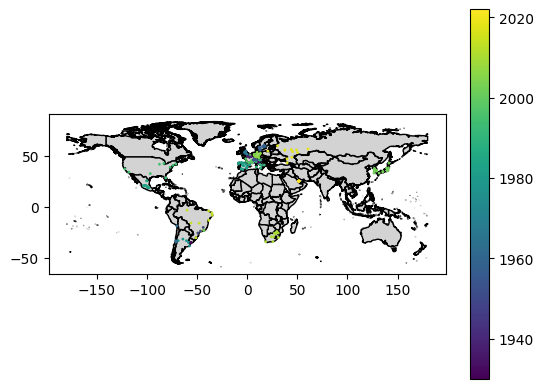

In [28]:
# add the gdf_dotmap points to the world map
ax = gdf_world.plot(edgecolor="black", facecolor="lightgray")
gdf_dotmap.plot(ax=ax, column='year', legend=True, markersize=1)

In [18]:
# Load the dotmap_world_future.csv file
df_dotmap_future = pd.read_csv(f"{directory}/dotmap_world_future.csv")
df_dotmap_future

,year,longitude,latitude
0,2026,-123.111944,49.276667
1,2026,-75.167760,39.900890
2,2026,-97.092880,32.747690
3,2026,-71.264344,42.090944
4,2026,-80.238889,25.958056
5,2026,-95.410833,29.684722
6,2026,-103.462778,20.681667
7,2026,-118.338000,33.950400
8,2026,-99.150556,19.303056
9,2026,-94.483889,39.048889


In [19]:
gdf_dotmap_future = gpd.GeoDataFrame(
    df_dotmap_future,
    geometry=gpd.points_from_xy(
        x=df_dotmap_future["longitude"],
        y=df_dotmap_future["latitude"]
    ),
    crs="EPSG:4326"
)
gdf_dotmap_future

,year,longitude,latitude,geometry
0,2026,-123.111944,49.276667,POINT (-123.11194 49.27667)
1,2026,-75.167760,39.900890,POINT (-75.16776 39.90089)
2,2026,-97.092880,32.747690,POINT (-97.09288 32.74769)
3,2026,-71.264344,42.090944,POINT (-71.26434 42.09094)
4,2026,-80.238889,25.958056,POINT (-80.23889 25.95806)
5,2026,-95.410833,29.684722,POINT (-95.41083 29.68472)
6,2026,-103.462778,20.681667,POINT (-103.46278 20.68167)
7,2026,-118.338000,33.950400,POINT (-118.338 33.9504)
8,2026,-99.150556,19.303056,POINT (-99.15056 19.30306)
9,2026,-94.483889,39.048889,POINT (-94.48389 39.04889)


<Axes: >

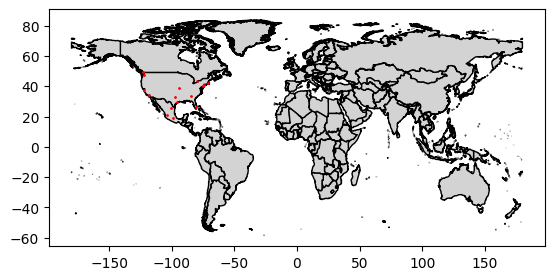

In [20]:
# add the gdf_dotmap_future points to the world map
ax = gdf_world.plot(edgecolor="black", facecolor="lightgray")
gdf_dotmap_future.plot(ax=ax, color="red", markersize=1)

## Mystery 2

The file https://datasci112.stanford.edu/data/dotmap_us.csv contains a mystery data set consisting of locations in the United States.

Make a dot map of this data on top of a U.S. map. You can download a shapefile of the U.S. states from [the U.S. Census Bureau website](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html).

Can you figure out what this is a data set of?

In [54]:
gdf_us = gpd.read_file(f"{directory}/cb_2024_us_state_500k.zip")
gdf_us

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341670967,3387563375,"POLYGON ((-104.05788 44.9976, -104.05078 44.99..."
2,06,01779778,0400000US06,06,CA,California,00,403673433805,20291632828,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131185561946,4581813708,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,149485762701,4419221858,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."
6,05,00068085,0400000US05,05,AR,Arkansas,00,134658517854,3122715710,"POLYGON ((-94.61792 36.49941, -94.61765 36.499..."
7,42,01779798,0400000US42,42,PA,Pennsylvania,00,115881476238,3397613881,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
8,29,01779791,0400000US29,29,MO,Missouri,00,178052403953,2487375487,"POLYGON ((-95.77355 40.5782, -95.76853 40.5833..."
9,08,01779779,0400000US08,08,CO,Colorado,00,268418973518,1185541418,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."


In [40]:
gdf_us.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

(-14.548699, 71.387815)

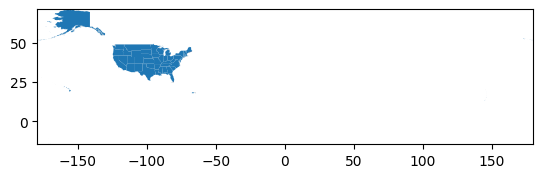

In [37]:
ax = gdf_us.plot()
minx, miny, maxx, maxy = gdf_us.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [38]:
df_dotmap_us = pd.read_csv(f"{directory}/dotmap_us.csv")
df_dotmap_us

,lon,lat
0,-117.71552,48.27629
1,-120.07118,47.64708
2,-117.97244,46.32375
3,-121.99150,47.20427
4,-120.01681,47.84083
...,...,...
448,-92.63354,45.35607
449,-89.73846,43.00861
450,-90.24601,46.42800
451,-90.68836,44.01272


In [41]:
gdf_dotmap_us = gpd.GeoDataFrame(
    df_dotmap_us,
    geometry=gpd.points_from_xy(
        x=df_dotmap_us["lon"],
        y=df_dotmap_us["lat"],
    ),
    crs="EPSG:4269"
)
gdf_dotmap_us

,lon,lat,geometry
0,-117.71552,48.27629,POINT (-117.71552 48.27629)
1,-120.07118,47.64708,POINT (-120.07118 47.64708)
2,-117.97244,46.32375,POINT (-117.97244 46.32375)
3,-121.99150,47.20427,POINT (-121.9915 47.20427)
4,-120.01681,47.84083,POINT (-120.01681 47.84083)
...,...,...,...
448,-92.63354,45.35607,POINT (-92.63354 45.35607)
449,-89.73846,43.00861,POINT (-89.73846 43.00861)
450,-90.24601,46.42800,POINT (-90.24601 46.428)
451,-90.68836,44.01272,POINT (-90.68836 44.01272)


<Axes: >

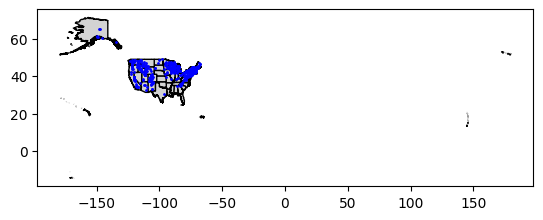

In [42]:
# Add the gdf_dotmap_us points to the US map
ax = gdf_us.plot(edgecolor="black", facecolor="lightgray")
gdf_dotmap_us.plot(ax=ax, color="blue", markersize=1)

<Axes: >

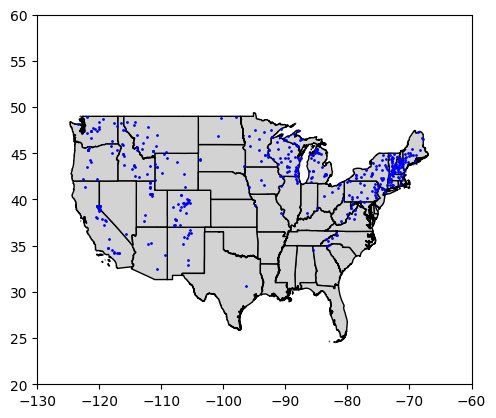

In [48]:
# Zoom in on the northeast US
ax = gdf_us.plot(edgecolor="black", facecolor="lightgray")
ax.set_xlim(-130, -60)
ax.set_ylim(20, 60)
gdf_dotmap_us.plot(ax=ax, color="blue", markersize=1)

<Axes: >

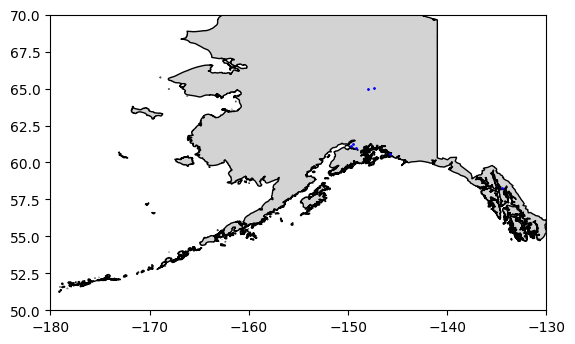

In [51]:
ax = gdf_us.plot(edgecolor="black", facecolor="lightgray")
ax.set_xlim(-180, -130)
ax.set_ylim(50, 70)
gdf_dotmap_us.plot(ax=ax, color="blue", markersize=1)

In [52]:
# Use geopy to find the name of the locations from latitude and longitude
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")    

In [53]:
# Latitude & Longitude input
Latitude = "25.594095"
Longitude = "85.137566"

location = geolocator.reverse(Latitude+","+Longitude)

# Display
print(location)

GeocoderInsufficientPrivileges: Non-successful status code 403